In [7]:
import pandas as pd

alsod_cases = pd.read_csv("/Users/noot/Documents/case-control-genomics/src/projects/ALSoD60-aals-rsID-rareBinned-0.0025MAF/LogisticRegression/excessResults_LogisticRegression_ALSoD60-aals-rsID-rareBinned-0.0025MAF.csv").query("label==1")
alsod_controls = pd.read_csv("/Users/noot/Documents/case-control-genomics/src/projects/ALSoD60-aals-rsID-rareBinned-0.0025MAF/LogisticRegression/testResults_LogisticRegression_ALSoD60-aals-rsID-rareBinned-0.0025MAF.csv").query("label==0")

nups_cases = pd.read_csv("/Users/noot/Documents/case-control-genomics/src/projects/NUPs60-aals-rsID-rareBinned-0.0025MAF/LogisticRegression/excessResults_LogisticRegression_NUPs60-aals-rsID-rareBinned-0.0025MAF.csv").query("label==1")
nups_controls = pd.read_csv("/Users/noot/Documents/case-control-genomics/src/projects/NUPs60-aals-rsID-rareBinned-0.0025MAF/LogisticRegression/testResults_LogisticRegression_NUPs60-aals-rsID-rareBinned-0.0025MAF.csv").query("label==0")

In [12]:
all_cases = alsod_cases.merge(nups_cases, on='id', suffixes=['_alsod', '_nups'])
all_controls = alsod_controls.merge(nups_controls, on='id', suffixes=['_alsod', '_nups'])

In [14]:
all_cases

,id,probability_mean_alsod,probability_std_alsod,prediction_most_frequent_alsod,label_alsod,accuracy_mean_alsod,accuracy_std_alsod,draw_count_alsod,probability_mean_nups,probability_std_nups,prediction_most_frequent_nups,label_nups,accuracy_mean_nups,accuracy_std_nups,draw_count_nups
0,ALS__CGND-HDA-00001__UP-WGS-185,0.657351,0.130703,1,1,0.920000,0.274048,50,0.494458,0.030077,0,1,0.280556,0.449896,360
1,ALS__CGND-HDA-00004__UP-WGS-187,0.465470,0.123848,0,1,0.357143,0.482617,70,0.542456,0.044792,1,1,0.932353,0.251509,340
2,ALS__CGND-HDA-00008__UP-WGS-191,0.535300,0.112408,1,1,0.657143,0.478091,70,0.488969,0.038894,0,1,0.484211,0.500409,380
3,ALS__CGND-HDA-00012__UP-WGS-195,0.451153,0.108256,0,1,0.228571,0.422944,70,0.536922,0.047722,1,1,0.920513,0.270845,390
4,ALS__CGND-HDA-00013__UP-WGS-196,0.404376,0.110216,0,1,0.150000,0.360085,60,0.518798,0.039887,1,1,0.650000,0.477717,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,aals-ALS__CGND-HDA-04083__NEURN392PGA,0.642065,0.096190,1,1,0.971429,0.167802,70,0.503222,0.033783,0,1,0.318421,0.466478,380
2056,aals-ALS__CGND-HDA-04084__NEUHZ364FZW,0.497333,0.093330,0,1,0.380000,0.490314,50,0.485779,0.022826,0,1,0.151351,0.358876,370
2057,aals-ALS__CGND-HDA-04085__NEUXZ486GG5,0.412134,0.098650,0,1,0.157143,0.366563,70,0.486045,0.041443,1,1,0.545238,0.498543,420
2058,aals-ALS__CGND-HDA-04086__NEUDH813DE6,0.523501,0.085291,0,1,0.460000,0.503457,50,0.466190,0.044157,0,1,0.061905,0.241270,420


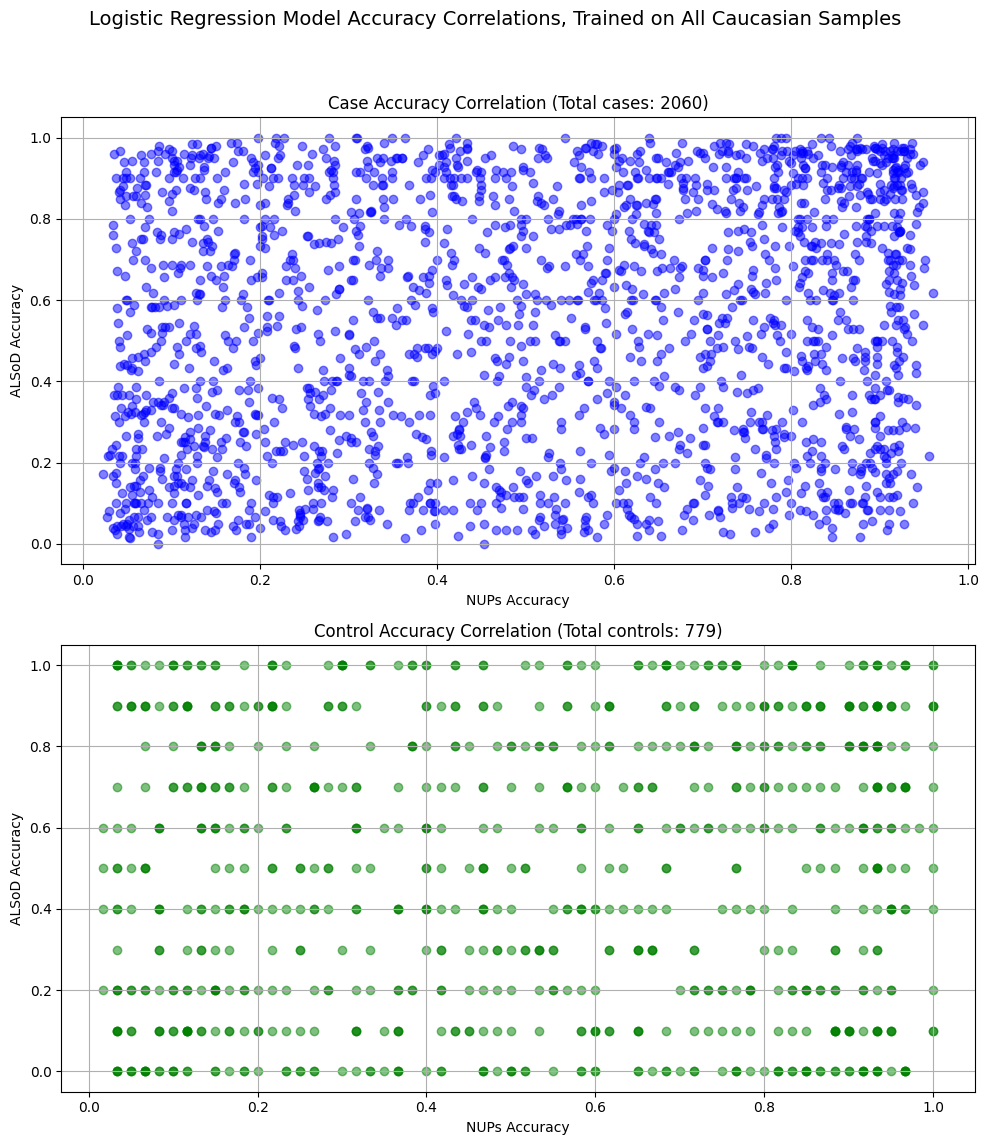

In [16]:
import matplotlib.pyplot as plt

# Plotting the scatterplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Scatterplot for cases
ax[0].scatter(all_cases['accuracy_mean_nups'], all_cases['accuracy_mean_alsod'], color='blue', alpha=0.5)
ax[0].set_title(f'Case Accuracy Correlation (Total cases: {len(all_cases)})')
ax[0].set_xlabel('NUPs Accuracy')
ax[0].set_ylabel('ALSoD Accuracy')
ax[0].grid(True)

# Scatterplot for controls
ax[1].scatter(all_controls['accuracy_mean_nups'], all_controls['accuracy_mean_alsod'], color='green', alpha=0.5)
ax[1].set_title(f'Control Accuracy Correlation (Total controls: {len(all_controls)})')
ax[1].set_xlabel('NUPs Accuracy')
ax[1].set_ylabel('ALSoD Accuracy')
ax[1].grid(True)

# Overall title
plt.suptitle('Logistic Regression Model Accuracy Correlations, Trained on All Caucasian Samples', fontsize=14)

# Show plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

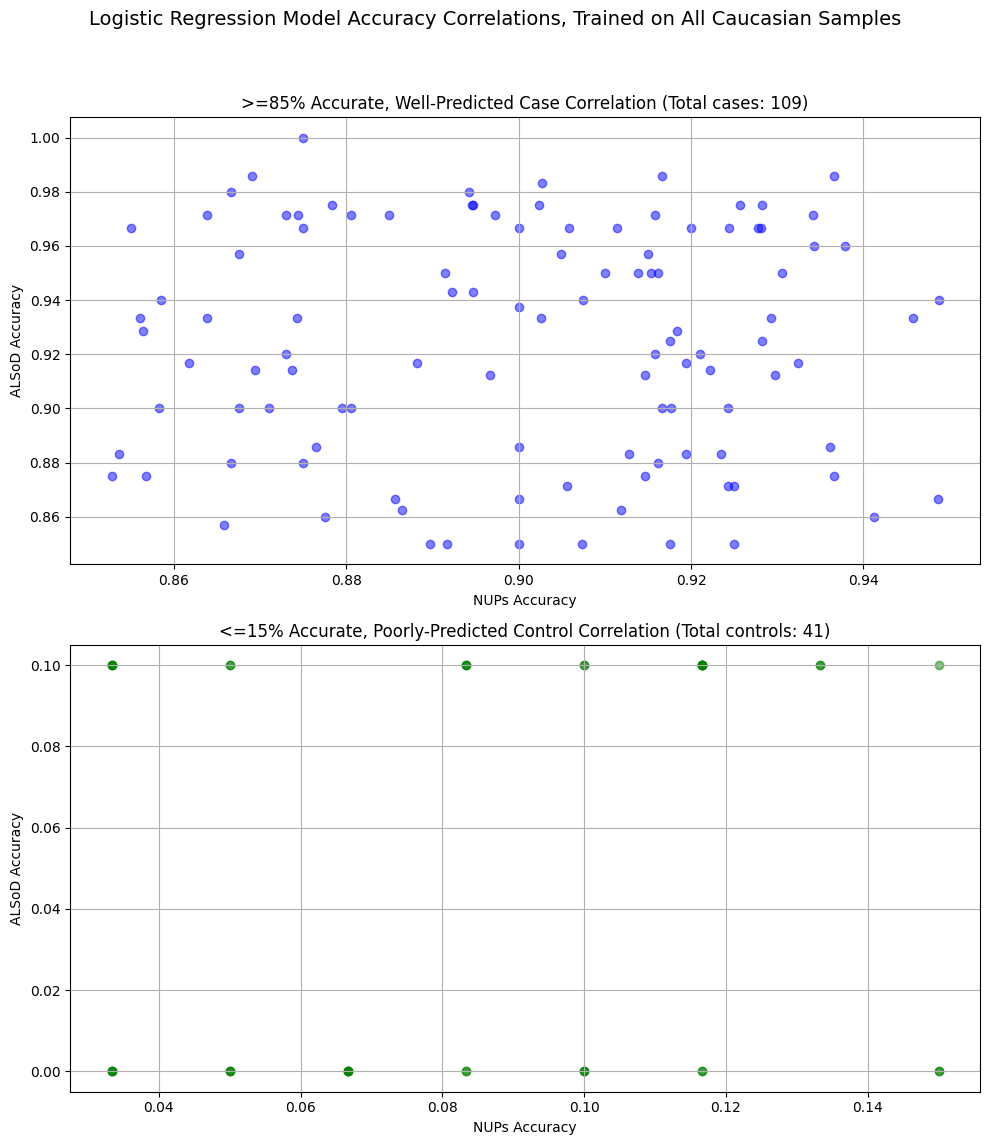

In [19]:
accurate_cases = all_cases.query('accuracy_mean_nups>=0.85 & accuracy_mean_alsod>=0.85')
inaccurate_controls = all_controls.query('accuracy_mean_nups<=0.15 & accuracy_mean_alsod<=0.15')

# Plotting the scatterplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Scatterplot for cases
ax[0].scatter(accurate_cases['accuracy_mean_nups'], accurate_cases['accuracy_mean_alsod'], color='blue', alpha=0.5)
ax[0].set_title(f'>=85% Accurate, Well-Predicted Case Correlation (Total cases: {len(accurate_cases)})')
ax[0].set_xlabel('NUPs Accuracy')
ax[0].set_ylabel('ALSoD Accuracy')
ax[0].grid(True)

# Scatterplot for controls
ax[1].scatter(inaccurate_controls['accuracy_mean_nups'], inaccurate_controls['accuracy_mean_alsod'], color='green', alpha=0.5)
ax[1].set_title(f'<=15% Accurate, Poorly-Predicted Control Correlation (Total controls: {len(inaccurate_controls)})')
ax[1].set_xlabel('NUPs Accuracy')
ax[1].set_ylabel('ALSoD Accuracy')
ax[1].grid(True)

# Overall title
plt.suptitle('Logistic Regression Model Accuracy Correlations, Trained on All Caucasian Samples', fontsize=14)

# Show plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Separating Cases with Extreme Accuracy 

In [5]:
from tasks.input import processInputFiles
from config import config

# load genotype data
genotypeData, frequencyReferenceGenotypeData, filteredClinicalData = processInputFiles(config)

19:04:17.167 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


19:04:17.402 | INFO    | prefect.engine - Created flow run 'prehistoric-puffin' for flow 'processInputFiles'

19:04:17.404 | WARNING | Flow run 'prehistoric-puffin' - Task runner 'RayTaskRunner' does not implement the `duplicate` method and will fail if used for concurrent execution of the same flow.

19:04:17.406 | INFO    | prefect.task_runner.ray - Creating a local Ray instance

2024-05-15 19:04:17,406	WARNING worker.py:1395 -- SIGTERM handler is not set because current thread is not the main thread.
2024-05-15 19:04:19,343	INFO worker.py:1724 -- Started a local Ray instance.


19:04:20.057 | INFO    | prefect.task_runner.ray - Using Ray cluster with 1 nodes.

19:04:20.137 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:04:20.181 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'load-0' for task 'load'

19:04:20.182 | INFO    | Flow run 'prehistoric-puffin' - Executing 'load-0' immediately...

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


19:05:32.257 | INFO    | Task run 'load-0' - Finished in state Completed()

19:05:32.259 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:05:32.276 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'filterTable-0' for task 'filterTable'

19:05:32.277 | INFO    | Flow run 'prehistoric-puffin' - Executing 'filterTable-0' immediately...

19:05:32.302 | INFO    | Task run 'filterTable-0' - Filtering: pct_european>=0.85

19:05:32.330 | INFO    | Task run 'filterTable-0' - Finished in state Completed()

19:05:32.332 | INFO    | Flow run 'prehistoric-puffin' - dropped 597 samples from clinical data

19:05:32.333 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:05:32.349 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'filterTable-1' for task 'filterTable'

19:05:32.350 | INFO    | Flow run 'prehistoric-puffin' - Executing 'filterTable-1' immediately...

19:05:32.389 | INFO    | Task run 'filterTable-1' - Filtering: `Superpopulation code`=='EUR'

19:05:32.425 | INFO    | Task run 'filterTable-1' - Finished in state Completed()

19:05:32.427 | INFO    | Flow run 'prehistoric-puffin' - dropped 4309 samples from external data ../adhoc analysis/igsr-1000 genomes phase 3 release.tsv

19:05:32.428 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:05:32.447 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'filterTable-2' for task 'filterTable'

19:05:32.448 | INFO    | Flow run 'prehistoric-puffin' - Executing 'filterTable-2' immediately...

19:05:32.474 | INFO    | Task run 'filterTable-2' - Filtering: `Superpopulation code`!='EUR'

19:05:32.497 | INFO    | Task run 'filterTable-2' - Finished in state Completed()

19:05:32.498 | INFO    | Flow run 'prehistoric-puffin' - dropped 669 samples from external data ../adhoc analysis/igsr-1000 genomes phase 3 release.tsv

19:05:32.499 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:05:32.513 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'filterTable-3' for task 'filterTable'

19:05:32.514 | INFO    | Flow run 'prehistoric-puffin' - Executing 'filterTable-3' immediately...

19:05:32.541 | INFO    | Task run 'filterTable-3' - Filtering: `Subject Group`.str.contains('ALS Spectrum MND') & `pct_european`<0.85

19:05:32.567 | INFO    | Task run 'filterTable-3' - Finished in state Completed()

19:05:32.568 | INFO    | Flow run 'prehistoric-puffin' - dropped 4140 samples from external data ../adhoc analysis/ACWM_ethnicallyVariable.tsv

19:05:32.569 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:05:32.583 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'filterTable-4' for task 'filterTable'

19:05:32.583 | INFO    | Flow run 'prehistoric-puffin' - Executing 'filterTable-4' immediately...

19:05:32.609 | INFO    | Task run 'filterTable-4' - Filtering: `Subject Group`=='Non-Neurological Control' & `pct_european`<0.85

19:05:32.633 | INFO    | Task run 'filterTable-4' - Finished in state Completed()

19:05:32.634 | INFO    | Flow run 'prehistoric-puffin' - dropped 4426 samples from external data ../adhoc analysis/ACWM_ethnicallyVariable.tsv

19:05:32.635 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:05:32.649 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'filterTable-5' for task 'filterTable'

19:05:32.649 | INFO    | Flow run 'prehistoric-puffin' - Executing 'filterTable-5' immediately...

19:05:32.690 | INFO    | Task run 'filterTable-5' - Finished in state Completed()

19:05:32.692 | INFO    | Flow run 'prehistoric-puffin' - dropped 0 samples from external data ../adhoc analysis/ACWM_otherNeurological.tsv

19:05:32.693 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:05:32.706 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'filterTable-6' for task 'filterTable'

19:05:32.706 | INFO    | Flow run 'prehistoric-puffin' - Executing 'filterTable-6' immediately...

19:05:32.733 | INFO    | Task run 'filterTable-6' - Filtering: `Superpopulation code`!='EUR'

19:05:32.754 | INFO    | Task run 'filterTable-6' - Finished in state Completed()

19:05:32.755 | INFO    | Flow run 'prehistoric-puffin' - dropped 669 samples from external data ../adhoc analysis/igsr-1000 genomes phase 3 release.tsv

19:05:32.756 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:05:32.769 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'filterTable-7' for task 'filterTable'

19:05:32.770 | INFO    | Flow run 'prehistoric-puffin' - Executing 'filterTable-7' immediately...

19:05:32.825 | INFO    | Task run 'filterTable-7' - Filtering: `Subject Group`=='Non-Neurological Control' & `pct_european`<0.85

19:05:32.884 | INFO    | Task run 'filterTable-7' - Finished in state Completed()

19:05:32.887 | INFO    | Flow run 'prehistoric-puffin' - dropped 4426 samples from external data ../adhoc analysis/ACWM_ethnicallyVariable.tsv

19:05:32.888 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:05:32.915 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'filterTable-8' for task 'filterTable'

19:05:32.916 | INFO    | Flow run 'prehistoric-puffin' - Executing 'filterTable-8' immediately...

19:05:32.966 | INFO    | Task run 'filterTable-8' - Finished in state Completed()

19:05:32.967 | INFO    | Flow run 'prehistoric-puffin' - filtered 0 variants from VCF

19:05:32.985 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:05:33.005 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'integrateExternalSampleIDs-0' for task 'integrateExternalSampleIDs'

19:05:33.006 | INFO    | Flow run 'prehistoric-puffin' - Executing 'integrateExternalSampleIDs-0' immediately...

19:05:33.050 | INFO    | Task run 'integrateExternalSampleIDs-0' - Finished in state Completed()

19:05:33.162 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


19:05:33.376 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'processAlleles-0' for task 'processAlleles'

19:05:33.576 | INFO    | Flow run 'prehistoric-puffin' - Submitted task run 'processAlleles-0' for execution.

19:05:33.601 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'processAlleles-1' for task 'processAlleles'

19:05:33.797 | INFO    | Flow run 'prehistoric-puffin' - Submitted task run 'processAlleles-1' for execution.

(_run_prefect_task pid=47257) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion'


Processing crossval IDs: 100%|██████████| 1024/1024 [00:02<00:00, 371.37id/s]
(_run_prefect_task pid=47253) 19:05:40.374 | INFO    | Task run 'processAlleles-1' - Finished in state Completed()
Processing crossval IDs: 100%|██████████| 2942/2942 [00:07<00:00, 380.28id/s]
(_run_prefect_task pid=47257) 19:05:45.486 | INFO    | Task run 'processAlleles-0' - Finished in state Completed()
19:05:45.807 | ERROR   | MainThread   | prefect._internal.concurrency - Detected unsafe call to `from_sync` from thread with event loop. Use `await greenback.ensure_portal()` to allow call to run without blocking the event loop.


(_run_prefect_task pid=47257) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion' [repeated 3x across cluster]


19:05:45.954 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'processAlleles-2' for task 'processAlleles'

19:05:46.133 | INFO    | Flow run 'prehistoric-puffin' - Submitted task run 'processAlleles-2' for execution.

19:05:46.139 | INFO    | Flow run 'prehistoric-puffin' - Created task run 'processAlleles-3' for task 'processAlleles'

19:05:46.309 | INFO    | Flow run 'prehistoric-puffin' - Submitted task run 'processAlleles-3' for execution.

Processing AnswerALS Cases vs. Controls (Ethnically-Variable) IDs:   0%|          | 0/344 [00:00<?, ?id/s]
Processing AnswerALS Cases vs. Controls (Ethnically-Variable) IDs:  12%|█▏        | 40/344 [00:00<00:00, 396.12id/s]
Processing AnswerALS Cases vs. Controls (Ethnically-Variable) IDs:  23%|██▎       | 80/344 [00:00<00:00, 364.97id/s]
Processing AnswerALS Cases vs. Controls (Ethnically-Variable) IDs:  35%|███▌      | 121/344 [00:00<00:00, 383.19id/s]
Processing AnswerALS Cases vs. Controls (Ethnically-Variable) IDs: 100%|██████████| 344/344 [00:00<00:00, 369.88id/s]
Processing Other Neurological Cases vs. Controls (Ethnically-Variable) IDs:   0%|          | 0/282 [00:00<?, ?id/s]
Processing Other Neurological Cases vs. Controls (Ethnically-Variable) IDs:  15%|█▍        | 41/282 [00:00<00:00, 409.71id/s]
Processing Other Neurological Cases vs. Controls (Ethnically-Variable) IDs:  30%|██▉       | 84/282 [00:00<00:00, 416.53id/s]
Processing Other Neurological Cases vs. Controls (Ethni

(_run_prefect_task pid=47253) Warning!  Failed to load collection 'prefect_dask': ModuleNotFoundError: No module named 'prefect.orion' [repeated 4x across cluster]


19:06:12.151 | INFO    | Flow run 'prehistoric-puffin' - 
missing 872 case IDs:
 {'CGND-HDA-04378', 'CGND-HDA-04583', 'CGND-HDA-04775', 'CGND-HDA-04706', 'CGND-HDA-04230', 'CGND-HDA-04660', 'CGND-HDA-03129', 'CGND-HDA-00239', 'CGND-HDA-03299', 'CGND-HDA-05296', 'CGND-HDA-04615', 'CGND-HDA-04658', 'CGND-HDA-05309', 'CGND-HDA-03296', 'CGND-HDA-01124', 'CGND-HDA-00621', 'CGND-HDA-04164', 'CGND-HDA-04374', 'CGND-HDA-03366', 'CGND-HDA-04548', 'CGND-HDA-04166', 'CGND-HDA-04684', 'CGND-HDA-04122', 'CGND-HDA-04962', 'CGND-HDA-04478', 'CGND-HDA-04202', 'CGND-HDA-04675', 'CGND-HDA-04631', 'CGND-HDA-03108', 'CGND-HDA-02872', 'CGND-HDA-04599', 'CGND-HDA-04479', 'CGND-HDA-04645', 'CGND-HDA-04954', 'CGND-HDA-04662', 'CGND-HDA-04294', 'CGND-HDA-02892', 'CGND-HDA-04112', 'CGND-HDA-00181', 'CGND-HDA-04148', 'CGND-HDA-03287', 'CGND-HDA-04800', 'CGND-HDA-05512', 'CGND-HDA-02483-1', 'CGND-HDA-04245', 'CGND-HDA-04287', 'CGND-HDA-04407', 'CGND-HDA-04539', 'CGND-HDA-04696', 'CGND-HDA-04503', 'CGND-HDA-04542', 'CGND-HDA-05307', 'CGND-HDA-01469', 'CGND-HDA-04130', 'CGND-HDA-02897', 'CGND-HDA-04184', 'CGND-HDA-03328', 'CGND-HDA-04507', 'CGND-HDA-04154', 'CGND-HDA-04847', 'CGND-HDA-04293', 'CGND-HDA-03317', 'CGND-HDA-03114', 'CGND-HDA-04611', 'CGND-HDA-04654', 'CGND-HDA-05291', 'CGND-HDA-04941', 'CGND-HDA-03307', 'CGND-HDA-04949', 'CGND-HDA-05529', 'CGND-HDA-01036', 'CGND-HDA-00174', 'CGND-HDA-03360', 'CGND-HDA-04186', 'CGND-HDA-04524', 'CGND-HDA-04408', 'CGND-HDA-04429', 'CGND-HDA-03352', 'CGND-HDA-04845', 'CGND-HDA-04363', 'CGND-HDA-03119', 'CGND-HDA-04663', 'CGND-HDA-04388', 'CGND-HDA-02406-2', 'CGND-HDA-04594', 'CGND-HDA-03113', 'CGND-HDA-04774', 'CGND-HDA-04229', 'CGND-HDA-04207', 'CGND-HDA-03295', 'CGND-HDA-04898', 'CGND-HDA-04532', 'CGND-HDA-05502', 'CGND-HDA-02896', 'CGND-HDA-04422', 'CGND-HDA-04482', 'CGND-HDA-04784', 'CGND-HDA-04488', 'CGND-HDA-04674', 'CGND-HDA-04158', 'CGND-HDA-04558', 'CGND-HDA-04896', 'CGND-HDA-04666', 'CGND-HDA-00186-2', 'CGND-HDA-04206', 'CGND-HDA-00595', 'CGND-HDA-04427', 'CGND-HDA-04163', 'CGND-HDA-05294', 'CGND-HDA-04276', 'CGND-HDA-04439', 'CGND-HDA-04224', 'CGND-HDA-04738', 'CGND-HDA-04882', 'CGND-HDA-04926', 'CGND-HDA-04538', 'CGND-HDA-04681', 'CGND-HDA-04605', 'CGND-HDA-04458', 'CGND-HDA-03293', 'CGND-HDA-00172', 'CGND-HDA-04756', 'CGND-HDA-04582', 'CGND-HDA-04131', 'CGND-HDA-04812', 'CGND-HDA-04639', 'CGND-HDA-02498-1', 'CGND-HDA-04173', 'CGND-HDA-01472', 'CGND-HDA-04271', 'CGND-HDA-00711', 'CGND-HDA-04195', 'CGND-HDA-04878', 'CGND-HDA-04652', 'CGND-HDA-04947', 'CGND-HDA-04933', 'CGND-HDA-04435', 'CGND-HDA-04879', 'CGND-HDA-04252', 'CGND-HDA-04900', 'CGND-HDA-04219', 'CGND-HDA-04903', 'CGND-HDA-02866', 'CGND-HDA-03186', 'CGND-HDA-04551', 'CGND-HDA-04559', 'CGND-HDA-05306', 'CGND-HDA-04182', 'CGND-HDA-03349', 'CGND-HDA-04603', 'CGND-HDA-05550', 'CGND-HDA-04444', 'CGND-HDA-04146', 'CGND-HDA-04564', 'CGND-HDA-02304', 'CGND-HDA-04505', 'CGND-HDA-04253', 'CGND-HDA-01364', 'CGND-HDA-04908', 'CGND-HDA-04808', 'CGND-HDA-03367', 'CGND-HDA-04502', 'CGND-HDA-04939', 'CGND-HDA-04614', 'CGND-HDA-04512', 'CGND-HDA-04640', 'CGND-HDA-01359', 'CGND-HDA-04321', 'CGND-HDA-05289', 'CGND-HDA-00238', 'CGND-HDA-04857', 'CGND-HDA-04556', 'CGND-HDA-04121', 'CGND-HDA-04761', 'CGND-HDA-04387', 'CGND-HDA-04948', 'CGND-HDA-05496', 'CGND-HDA-04409', 'CGND-HDA-04860', 'CGND-HDA-04671', 'CGND-HDA-04419', 'CGND-HDA-04571', 'CGND-HDA-02879', 'CGND-HDA-04767', 'CGND-HDA-03303', 'CGND-HDA-04415', 'CGND-HDA-04318', 'CGND-HDA-04385', 'CGND-HDA-04609', 'CGND-HDA-03118', 'CGND-HDA-04648', 'CGND-HDA-04510', 'CGND-HDA-04421', 'CGND-HDA-04778', 'CGND-HDA-04239', 'CGND-HDA-04348', 'CGND-HDA-04437', 'CGND-HDA-04566', 'CGND-HDA-04465', 'CGND-HDA-04957', 'CGND-HDA-04691', 'CGND-HDA-03324', 'CGND-HDA-04523', 'CGND-HDA-04441', 'CGND-HDA-05506', 'CGND-HDA-04585', 'CGND-HDA-03378', 'CGND-HDA-05530', 'CGND-HDA-04791', 'CGND-HDA-04574', 'CGND-HDA-04168', 'CGND-HDA-05539', 'CGND-HDA-04934', 'CGND-HDA-04372', 'CGND-HDA-04192', 'CGND-HDA-03334', 'CGND-HDA-04140', 'CGN

19:06:12.161 | INFO    | Flow run 'prehistoric-puffin' - 
missing 244 control IDs:
 {'CGND-HDA-02883', 'HG01780', 'HG04302', 'CGND-HDA-02489-1', 'CGND-HDA-02837', 'NA07031', 'HG01532', 'NA11917', 'NA12818', 'HG01505', 'NA20831', 'NA11882', 'NA12344', 'CGND-HDA-00179', 'CGND-HDA-04828', 'HG01703', 'NA12056', 'NA07045', 'NA20537', 'CGND-HDA-03175', 'NA10831', 'NA12248', 'CGND-HDA-02878', 'CGND-HDA-02887', 'NA07029', 'NA10865', 'HG01614', 'CGND-HDA-04735', 'CGND-HDA-03182', 'CGND-HDA-00216', 'NA10854', 'NA10859', 'CGND-HDA-02870', 'HG01616', 'HG01706', 'NA10846', 'NA12864', 'CGND-HDA-03171', 'NA12375', 'CGND-HDA-03164', 'HG01523', 'HG01674', 'HG02237', 'HG01755', 'CGND-HDA-03294', 'NA12766', 'NA07055', 'CGND-HDA-03183', 'NA10835', 'CGND-HDA-02891', 'HG01782', 'CGND-HDA-03356', 'NA12057', 'HG01677', 'NA10842', 'CGND-HDA-00180', 'NA12264', 'HG00249', 'CGND-HDA-03163', 'NA12329', 'NA07349', 'NA12817', 'CGND-HDA-03169', 'NA06995', 'HG01772', 'CGND-HDA-05300', 'NA12343', 'HG00302', 'NA07435', 'HG01687', 'NA12274', 'NA07345', 'NA12546', 'CGND-HDA-04825', 'HG01701', 'HG00152', 'NA12767', 'CGND-HDA-03179', 'NA12802', 'HG01748', 'HG01511', 'CGND-HDA-03326', 'NA12752', 'HG01629', 'CGND-HDA-04734', 'HG01502', 'CGND-HDA-05535', 'CGND-HDA-02867', 'HG02218', 'CGND-HDA-00166', 'CGND-HDA-04830', 'HG01671', 'NA10830', 'HG00247', 'NA07014', 'NA12336', 'CGND-HDA-01167', 'CGND-HDA-03172', 'CGND-HDA-04922', 'NA10845', 'CGND-HDA-00167', 'HG00134', 'CGND-HDA-03170', 'NA12892', 'NA11891', 'HG02225', 'CGND-HDA-02868', 'NA07340', 'HG01778', 'NA06993', 'NA10838', 'NA07348', 'CGND-HDA-03297', 'HG00312', 'HG01514', 'CGND-HDA-03177', 'HG01526', 'CGND-HDA-03325', 'HG01696', 'HG01681', 'CGND-HDA-03168', 'NA12865', 'HG01763', 'NA07034', 'NA10839', 'NA11839', 'NA11993', 'NA12485', 'HG02240', 'HG01621', 'NA10850', 'CGND-HDA-04834', 'CGND-HDA-03369', 'HG01517', 'NA12236', 'CGND-HDA-02736', 'HG01622', 'HG01698', 'CGND-HDA-04822', 'NA10856', 'HG00135', 'NA12335', 'NA12740', 'CGND-HDA-00165', 'CGND-HDA-03398', 'NA10861', 'HG01787', 'HG00359', 'NA07019', 'HG01529', 'NA06997', 'NA10837', 'CGND-HDA-02880', 'CGND-HDA-03174', 'NA10863', 'HG01609', 'HG00156', 'NA12830', 'HG00377', 'CGND-HDA-04894', 'CGND-HDA-03185', 'CGND-HDA-01482', 'CGND-HDA-05299', 'HG04301', 'NA10852', 'HG02217', 'CGND-HDA-03318', 'NA12753', 'NA12146', 'CGND-HDA-04889', 'CGND-HDA-00214', 'HG01667', 'CGND-HDA-00178', 'HG00144', 'HG00124', 'NA12376', 'HG01601', 'HG02234', 'CGND-HDA-02863', 'NA10836', 'NA20526', 'CGND-HDA-02884', 'CGND-HDA-04923', 'NA12708', 'HG01711', 'NA20816', 'NA12875', 'NA10855', 'CGND-HDA-04835', 'HG04303', 'HG00153', 'HG01633', 'HG00303', 'HG00147', 'NA12891', 'CGND-HDA-04736', 'HG02229', 'HG00104', 'HG00270', 'CGND-HDA-04846', 'HG01764', 'NA12386', 'NA12239', 'CGND-HDA-04824', 'NA10853', 'NA20829', 'CGND-HDA-04733', 'NA12707', 'CGND-HDA-03184', 'CGND-HDA-04749', 'NA10843', 'NA12877', 'NA07022', 'HG01774', 'CGND-HDA-02865', 'CGND-HDA-00217', 'CGND-HDA-02876', 'HG00248', 'NA12801', 'HG01508', 'NA07346', 'NA10840', 'HG00098', 'CGND-HDA-04849', 'NA10857', 'HG01604', 'NA12832', 'NA10860', 'HG02222', 'HG01683', 'CGND-HDA-02869', 'NA12739', 'HG01627', 'CGND-HDA-05298', 'CGND-HDA-04848', 'CGND-HDA-03173', 'HG01611', 'NA06991', 'NA12145', 'CGND-HDA-02752', 'HG01520', 'NA10864', 'HG01538', 'HG01769'}

19:06:12.163 | INFO    | Flow run 'prehistoric-puffin' - 
AnswerALS Cases vs. Controls (Ethnically-Variable) missing 103 holdout cases IDs:
 {'CGND-HDA-04102', 'CGND-HDA-04814', 'CGND-HDA-04789', 'CGND-HDA-03304', 'CGND-HDA-04802', 'CGND-HDA-03288', 'CGND-HDA-03372', 'CGND-HDA-04306', 'CGND-HDA-04868', 'CGND-HDA-03188', 'CGND-HDA-04911', 'CGND-HDA-01172', 'CGND-HDA-03312', 'CGND-HDA-04477', 'CGND-HDA-03289', 'CGND-HDA-04919', 'CGND-HDA-04772', 'CGND-HDA-03314', 'CGND-HDA-04794', 'CGND-HDA-04801', 'CGND-HDA-04958', 'CGND-HDA-04859', 'CGND-HDA-03348', 'CGND-HDA-04863', 'CGND-HDA-04764', 'CGND-HDA-04656', 'CGND-HDA-04332', 'CGND-HDA-04720', 'CGND-HDA-03104', 'CGND-HDA-04955', 'CGND-HDA-01368', 'CGND-HDA-02874', 'CGND-HDA-04910', 'CGND-HDA-04927', 'CGND-HDA-04753', 'CGND-HDA-04797', 'CGND-HDA-04786', 'CGND-HDA-04358', 'CGND-HDA-04752', 'CGND-HDA-01367', 'CGND-HDA-04783', 'CGND-HDA-04766', 'CGND-HDA-04914', 'CGND-HDA-03332', 'CGND-HDA-04861', 'CGND-HDA-04313', 'CGND-HDA-04100', 'CGND-HDA-04788', 'CGND-HDA-04816', 'CGND-HDA-04665', 'CGND-HDA-04904', 'CGND-HDA-04466', 'CGND-HDA-00029', 'CGND-HDA-03189', 'CGND-HDA-04853', 'CGND-HDA-04779', 'CGND-HDA-04953', 'CGND-HDA-03319', 'CGND-HDA-04815', 'CGND-HDA-04842', 'CGND-HDA-04171', 'CGND-HDA-02894', 'CGND-HDA-04818', 'CGND-HDA-03330', 'CGND-HDA-04129', 'CGND-HDA-04751', 'CGND-HDA-05509', 'CGND-HDA-04810', 'CGND-HDA-02039', 'CGND-HDA-04798', 'CGND-HDA-04909', 'CGND-HDA-05508', 'CGND-HDA-04333', 'CGND-HDA-04901', 'CGND-HDA-04757', 'CGND-HDA-04770', 'CGND-HDA-04858', 'CGND-HDA-04511', 'CGND-HDA-04535', 'CGND-HDA-04806', 'CGND-HDA-04803', 'CGND-HDA-04952', 'CGND-HDA-04781', 'CGND-HDA-04809', 'CGND-HDA-04754', 'CGND-HDA-00981', 'CGND-HDA-00836', 'CGND-HDA-04668', 'CGND-HDA-04811', 'CGND-HDA-04760', 'CGND-HDA-00175', 'CGND-HDA-03120', 'CGND-HDA-04790', 'CGND-HDA-00176', 'CGND-HDA-04795', 'CGND-HDA-04763', 'CGND-HDA-03321', 'CGND-HDA-04096', 'CGND-HDA-05532', 'CGND-HDA-02041', 'CGND-HDA-03124', 'CGND-HDA-04940', 'CGND-HDA-04776'}

19:06:12.165 | INFO    | Flow run 'prehistoric-puffin' - 
Other Neurological Cases vs. Controls (Ethnically-Variable) missing 23 holdout cases IDs:
 {'CGND-HDA-04727', 'CGND-HDA-03376', 'CGND-HDA-03402', 'CGND-HDA-04729', 'CGND-HDA-04514', 'CGND-HDA-00225', 'CGND-HDA-04827', 'CGND-HDA-04877', 'CGND-HDA-04833', 'CGND-HDA-05536', 'CGND-HDA-00171', 'CGND-HDA-04516', 'CGND-HDA-04728', 'CGND-HDA-04730', 'CGND-HDA-04307', 'CGND-HDA-01360', 'CGND-HDA-04831', 'CGND-HDA-02862', 'CGND-HDA-04515', 'CGND-HDA-04826', 'CGND-HDA-00223', 'CGND-HDA-04893', 'CGND-HDA-04832'}

19:06:12.166 | INFO    | Flow run 'prehistoric-puffin' - 
AnswerALS Cases vs. Controls (Ethnically-Variable) missing 2315 holdout controls IDs:
 {'HG03194', 'HGDP01255', 'HGDP00975', 'GM19320', 'HG03110', 'HGDP01208', 'HG03116', 'NA19674', 'SC_GMWOF5428705', 'HGDP01029', 'NA19240', 'HG01189', 'HG01252', 'NA19398', 'HGDP00076', 'HG02261', 'SC_GMMAN5482173', 'HGDP00553', 'HGDP00700', 'HG01050', 'SC_GMMAN5482213', 'Bishkek28439', 'SC_GMJOL5309921', 'NA19103', 'SC_GMFUL5309708', 'NA18930', 'HG02978', 'HG03431', 'HG01084', 'HGDP00683', 'KD4', 'GM21487', 'SC_GMWOF5428827', 'HGDP00072', 'HGDP00956', 'SC_GMWOF5428826', 'HG03811', 'HGDP01192', 'HGDP00912', 'Sir19', 'HGDP01387', 'HGDP00359', 'SC_GMMAN5482306', 'NA19675', 'HG04128', 'HGDP00796', 'HG02027', 'HGDP00861', 'HG02547', 'HGDP00961', 'HG00512', 'HGDP00131', 'HGDP01161', 'SC_GMWOF5428815', 'HGDP01224', 'HG01579', 'SC_GMWOF5428814', 'HGDP01370', 'SC_GMWOF5428866', 'SC_GMMAN5482301', 'HG03029', 'HG02267', 'HG03626', 'HGDP00286', 'NA19123', 'HGDP01036', 'HG03059', 'HGDP00513', 'SC_GMMAN5482283', 'HG01934', 'Sir26', 'HGDP01351', 'HG01361', 'SC_GMMAN5482314', 'HG01178', 'HG04217', 'NA19919', 'SC_GMFUL5309725', 'HG01496', 'HGDP01086', 'HGDP00450', 'HGDP00781', 'HGDP01234', 'HGDP00807', 'HG03339', 'HG03992', 'HG01993', 'HG03307', 'NA15728', 'NA19186', 'HGDP00594', 'HGDP01289', 'HGDP01212', 'HGDP01303', 'HGDP00843', 'HG01347', 'SC_GMJOL5309920', 'HGDP00288', 'SC_GMMAN5482189', 'HGDP01006', 'SC_GMWOF5428857', 'HGDP01215', 'HGDP01260', 'NA19772', 'HGDP00043', 'HGDP01276', 'HG01952', 'HG02293', 'HGDP00121', 'HGDP00805', 'HGDP00646', 'HG03835', 'HGDP01315', 'NA19046', 'HG00702', 'HGDP00478', 'HGDP01044', 'HGDP00515', 'zapo0099', 'HGDP00667', 'HG03248', 'HG03799', 'HGDP00445', 'NA19672', 'HGDP00828', 'HGDP00889', 'HG01355', 'I3', 'HGDP01078', 'HG02276', 'HGDP00723', 'NA19396', 'HGDP00870', 'SC_GMMAN5482247', 'HGDP00772', 'HG02347', 'SC_GMJOL5309867', 'HG02939', 'HGDP00971', 'SC_GMMAN5482228', 'HGDP00533', 'HGDP00517', 'HGDP00767', 'HGDP01346', 'HG03688', 'HGDP00154', 'SC_GMFUL5306340', 'HGDP00290', 'HG01195', 'HGDP00575', 'HGDP00906', 'SC_GMJOL5309935', 'SC_GMJOL5309898', 'HGDP00932', 'HG00597', 'SC_GMMAN5482244', 'HG03161', 'SC_GMMAN5482203', 'HGDP00672', 'Jordan603', 'HG03988', 'NA19797', 'HGDP00037', 'HG01343', 'HG02770', 'HG02524', 'HGDP00313', 'SC_GMWOF5428859', 'YemeniteJew5433', 'HGDP00821', 'SC_GMFUL5309773', 'HG02514', 'HGDP01279', 'SC_GMFUL5309747', 'SC_GMWOF5428778', 'NA19249', 'SC_GMFUL5309703', 'NA19721', 'SC_GMJOL5309977', 'SC_GMMAN5482242', 'HG00418', 'SC_GMWOF5428729', 'HGDP00330', 'NA18852', 'Tuba9', 'HGDP01404', 'mixe0007', 'HG03134', 'HG03411', 'SC_GMFUL5309741', 'NA19738', 'HGDP00758', 'HG01439', 'HGDP00948', 'HG02788', 'HGDP00934', 'SC_GMWOF5428716', 'SC_GMFUL5306360', 'HGDP01377', 'HGDP00372', 'SC_GMWOF5428867', 'HG02071', 'HGDP00708', 'HG01199', 'HG03797', 'HGDP00974', 'HGDP00890', 'HGDP00143', 'NA19373', 'NA18515', 'HGDP00144', 'HG01172', 'SC_GMFUL5306421', 'HGDP01341', 'NA18791', 'HGDP00192', 'HGDP00629', 'HGDP01187', 'HGDP00179', 'NA20414', 'HGDP00454', 'NA19742', 'HGDP01098', 'SC_GMFUL5306385', 'HG02466', 'HGDP00888', 'HG02821', 'SC_GMMAN5482260', 'GM20355', 'HGDP00869', 'HGDP00907', 'HGDP00701', 'HGDP01291', 'HG04175', 'Jordan445', 'HG02004', 'HG01169', 'HG02168', 'HG02630', 'HGDP01090', 'HG02924', 'NA17386', 'HG01394', 'HG02068', 'HGDP01190', 'NA20413', 'HGDP00784', 'HGDP00698', 'HGDP00976', 'NA20360', 'NA15763', 'HGDP01233', 'HG00555', 'HG03621', 'HG03260', 'HG03972', 'HGDP00171', 'HGDP00737', 'HG01499', 'SC_GMJOL5309941', 'HGDP01275', 'HGDP01174', 'HG00635', 'SC_GMFUL5306403', 'HGDP01419', 'HGDP00538', 'HG01928', 'HGDP00464', 'HG00474', 'NA17377', 'HG01074', 'NA18594', 'HGDP01244', 'HG02288', 'SC_GMWOF5428825', 'HG03620', 'DNK07', 'HG01175', 'HGDP00511', 'HG01258', 'IHW9118', 'HGDP00468', 'HGDP00677', 'SC_GMWOF5428812', 'HGDP00027', 'NA20873', 'HG03450', 'HG04181', 'SC_GMMAN5482252', 'HG02170', 'HGDP00438', 'HG03171', 'SC_GMMAN5482220', 'HG02683', 'HG02415', 'HG

19:06:12.171 | INFO    | Flow run 'prehistoric-puffin' - 
Other Neurological Cases vs. Controls (Ethnically-Variable) missing 2315 holdout controls IDs:
 {'HG03194', 'HGDP01255', 'HGDP00975', 'GM19320', 'HG03110', 'HGDP01208', 'HG03116', 'NA19674', 'SC_GMWOF5428705', 'HGDP01029', 'NA19240', 'HG01189', 'HG01252', 'NA19398', 'HGDP00076', 'HG02261', 'SC_GMMAN5482173', 'HGDP00553', 'HGDP00700', 'HG01050', 'SC_GMMAN5482213', 'Bishkek28439', 'SC_GMJOL5309921', 'NA19103', 'SC_GMFUL5309708', 'NA18930', 'HG02978', 'HG03431', 'HG01084', 'HGDP00683', 'KD4', 'GM21487', 'SC_GMWOF5428827', 'HGDP00072', 'HGDP00956', 'SC_GMWOF5428826', 'HG03811', 'HGDP01192', 'HGDP00912', 'Sir19', 'HGDP01387', 'HGDP00359', 'SC_GMMAN5482306', 'NA19675', 'HG04128', 'HGDP00796', 'HG02027', 'HGDP00861', 'HG02547', 'HGDP00961', 'HG00512', 'HGDP00131', 'HGDP01161', 'SC_GMWOF5428815', 'HGDP01224', 'HG01579', 'SC_GMWOF5428814', 'HGDP01370', 'SC_GMWOF5428866', 'SC_GMMAN5482301', 'HG03029', 'HG02267', 'HG03626', 'HGDP00286', 'NA19123', 'HGDP01036', 'HG03059', 'HGDP00513', 'SC_GMMAN5482283', 'HG01934', 'Sir26', 'HGDP01351', 'HG01361', 'SC_GMMAN5482314', 'HG01178', 'HG04217', 'NA19919', 'SC_GMFUL5309725', 'HG01496', 'HGDP01086', 'HGDP00450', 'HGDP00781', 'HGDP01234', 'HGDP00807', 'HG03339', 'HG03992', 'HG01993', 'HG03307', 'NA15728', 'NA19186', 'HGDP00594', 'HGDP01289', 'HGDP01212', 'HGDP01303', 'HGDP00843', 'HG01347', 'SC_GMJOL5309920', 'HGDP00288', 'SC_GMMAN5482189', 'HGDP01006', 'SC_GMWOF5428857', 'HGDP01215', 'HGDP01260', 'NA19772', 'HGDP00043', 'HGDP01276', 'HG01952', 'HG02293', 'HGDP00121', 'HGDP00805', 'HGDP00646', 'HG03835', 'HGDP01315', 'NA19046', 'HG00702', 'HGDP00478', 'HGDP01044', 'HGDP00515', 'zapo0099', 'HGDP00667', 'HG03248', 'HG03799', 'HGDP00445', 'NA19672', 'HGDP00828', 'HGDP00889', 'HG01355', 'I3', 'HGDP01078', 'HG02276', 'HGDP00723', 'NA19396', 'HGDP00870', 'SC_GMMAN5482247', 'HGDP00772', 'HG02347', 'SC_GMJOL5309867', 'HG02939', 'HGDP00971', 'SC_GMMAN5482228', 'HGDP00533', 'HGDP00517', 'HGDP00767', 'HGDP01346', 'HG03688', 'HGDP00154', 'SC_GMFUL5306340', 'HGDP00290', 'HG01195', 'HGDP00575', 'HGDP00906', 'SC_GMJOL5309935', 'SC_GMJOL5309898', 'HGDP00932', 'HG00597', 'SC_GMMAN5482244', 'HG03161', 'SC_GMMAN5482203', 'HGDP00672', 'Jordan603', 'HG03988', 'NA19797', 'HGDP00037', 'HG01343', 'HG02770', 'HG02524', 'HGDP00313', 'SC_GMWOF5428859', 'YemeniteJew5433', 'HGDP00821', 'SC_GMFUL5309773', 'HG02514', 'HGDP01279', 'SC_GMFUL5309747', 'SC_GMWOF5428778', 'NA19249', 'SC_GMFUL5309703', 'NA19721', 'SC_GMJOL5309977', 'SC_GMMAN5482242', 'HG00418', 'SC_GMWOF5428729', 'HGDP00330', 'NA18852', 'Tuba9', 'HGDP01404', 'mixe0007', 'HG03134', 'HG03411', 'SC_GMFUL5309741', 'NA19738', 'HGDP00758', 'HG01439', 'HGDP00948', 'HG02788', 'HGDP00934', 'SC_GMWOF5428716', 'SC_GMFUL5306360', 'HGDP01377', 'HGDP00372', 'SC_GMWOF5428867', 'HG02071', 'HGDP00708', 'HG01199', 'HG03797', 'HGDP00974', 'HGDP00890', 'HGDP00143', 'NA19373', 'NA18515', 'HGDP00144', 'HG01172', 'SC_GMFUL5306421', 'HGDP01341', 'NA18791', 'HGDP00192', 'HGDP00629', 'HGDP01187', 'HGDP00179', 'NA20414', 'HGDP00454', 'NA19742', 'HGDP01098', 'SC_GMFUL5306385', 'HG02466', 'HGDP00888', 'HG02821', 'SC_GMMAN5482260', 'GM20355', 'HGDP00869', 'HGDP00907', 'HGDP00701', 'HGDP01291', 'HG04175', 'Jordan445', 'HG02004', 'HG01169', 'HG02168', 'HG02630', 'HGDP01090', 'HG02924', 'NA17386', 'HG01394', 'HG02068', 'HGDP01190', 'NA20413', 'HGDP00784', 'HGDP00698', 'HGDP00976', 'NA20360', 'NA15763', 'HGDP01233', 'HG00555', 'HG03621', 'HG03260', 'HG03972', 'HGDP00171', 'HGDP00737', 'HG01499', 'SC_GMJOL5309941', 'HGDP01275', 'HGDP01174', 'HG00635', 'SC_GMFUL5306403', 'HGDP01419', 'HGDP00538', 'HG01928', 'HGDP00464', 'HG00474', 'NA17377', 'HG01074', 'NA18594', 'HGDP01244', 'HG02288', 'SC_GMWOF5428825', 'HG03620', 'DNK07', 'HG01175', 'HGDP00511', 'HG01258', 'IHW9118', 'HGDP00468', 'HGDP00677', 'SC_GMWOF5428812', 'HGDP00027', 'NA20873', 'HG03450', 'HG04181', 'SC_GMMAN5482252', 'HG02170', 'HGDP00438', 'HG03171', 'SC_GMMAN5482220', 'HG02683', 'HG02

19:06:12.747 | INFO    | Flow run 'prehistoric-puffin' - Filtered 1157 alleles with frequency below 0.250% or above 100.000%

19:06:12.748 | INFO    | Flow run 'prehistoric-puffin' - Kept 159 alleles

19:06:13.739 | INFO    | Flow run 'prehistoric-puffin' - 
2070 cases

19:06:13.740 | INFO    | Flow run 'prehistoric-puffin' - 
780 controls
--

19:06:13.741 | INFO    | Flow run 'prehistoric-puffin' - 
241 AnswerALS Cases vs. Controls (Ethnically-Variable) cases

19:06:13.742 | INFO    | Flow run 'prehistoric-puffin' - 
259 Other Neurological Cases vs. Controls (Ethnically-Variable) cases

19:06:13.742 | INFO    | Flow run 'prehistoric-puffin' - 
2052 AnswerALS Cases vs. Controls (Ethnically-Variable) controls

19:06:13.743 | INFO    | Flow run 'prehistoric-puffin' - 
2052 Other Neurological Cases vs. Controls (Ethnically-Variable) controls

19:06:15.418 | INFO    | Flow run 'prehistoric-puffin' - Finished in state Completed()

In [6]:
genotypeData.case

Genotype(genotype=                                     ALS__CGND-HDA-04091__NEUHF998PCY  \
chrom position  rsID        Gene                                        
1     53772404  rs116087466 NDC1                                    0   
      53835513  rs41313377  NDC1                                    0   
      186332304 rs115482159 TPR                                     0   
      186334388 rs35766045  TPR                                     0   
      186334396 rs200189169 TPR                                     0   
...                                                               ...   
20    57374816  rs41310034  RAE1                                    0   
      57374838  rs41304419  RAE1                                    0   
      57374924  rs149934537 RAE1                                    0   
22    41254334  rs139571477 RANGAP1                                 0   
      41254383  rs754504580 RANGAP1                                 0   

                                

/Users/noot/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


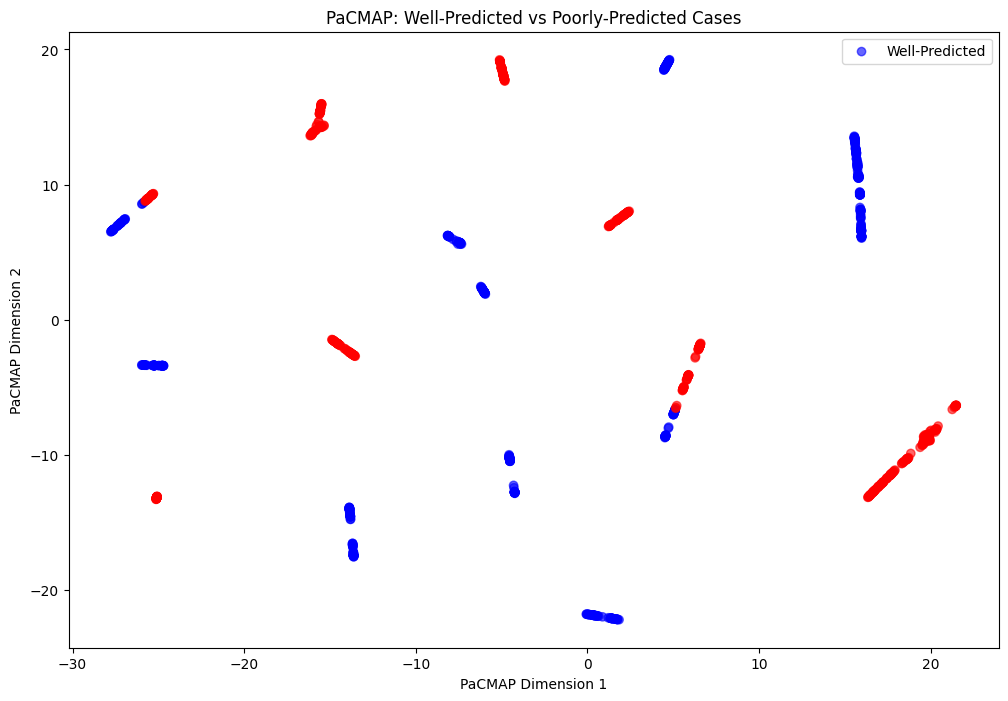

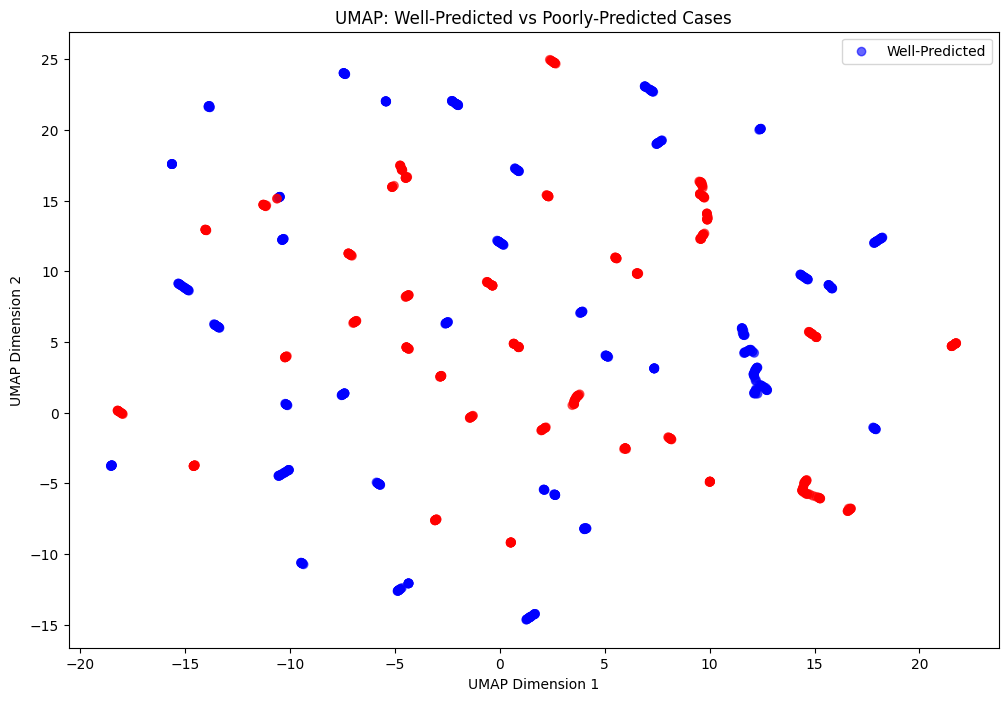

In [10]:
import pandas as pd
import pacmap
import umap
import matplotlib.pyplot as plt

# Load the dataset
results_file_path = '../src/projects/NUPs60-aals-rsID-rareBinned-0.0025MAF/LogisticRegression/testResults_LogisticRegression_NUPs60-aals-rsID-rareBinned-0.0025MAF.csv'
accuracy_results = pd.read_csv(results_file_path)

# Filter well-predicted cases (accuracy_mean >= 0.85) and poorly-predicted cases (accuracy_mean <= 0.15)
well_predicted = accuracy_results[accuracy_results['accuracy_mean'] >= 0.85]['id']
poorly_predicted = accuracy_results[accuracy_results['accuracy_mean'] <= 0.15]['id']



# Combine the filtered data for PACMAP
combined_data = pd.concat([well_predicted, poorly_predicted])
combined_data['accuracy_category'] = combined_data['accuracy_mean'].apply(lambda x: 'well' if x >= 0.85 else 'poor')

# Drop unnecessary columns
features = combined_data.drop(columns=['id', 'accuracy_category'])

# Initialize and fit the PaCMAP model
pacmap_model = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.75, FP_ratio=2.0)
pacmap_result = pacmap_model.fit_transform(features)

# Initialize and fit the UMAP model
umap_model = umap.UMAP(n_components=2)
umap_result = umap_model.fit_transform(features)

# Plot PaCMAP result
plt.figure(figsize=(12, 8))
plt.scatter(pacmap_result[:, 0], pacmap_result[:, 1], c=combined_data['accuracy_category'].map({'well': 'blue', 'poor': 'red'}), alpha=0.6)
plt.title('PaCMAP: Well-Predicted vs Poorly-Predicted Cases')
plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.legend(['Well-Predicted', 'Poorly-Predicted'])
plt.show()

# Plot UMAP result
plt.figure(figsize=(12, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=combined_data['accuracy_category'].map({'well': 'blue', 'poor': 'red'}), alpha=0.6)
plt.title('UMAP: Well-Predicted vs Poorly-Predicted Cases')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(['Well-Predicted', 'Poorly-Predicted'])
plt.show()
